# Imports

In [1]:
import os

from packages.mining import open_data
from packages.plotting import plot_data
from packages.computing import precip_climato

directory = os.chdir("/home/leopaul/Climate_Change_PO/")

# Data analyse

## General view

In [2]:
sr = open_data(
    "data/FRNOR.RR2025010565429.PPDH.KEYuAAuu91dxAxu2BfU7xuA.csv",
    "RR1"
)

/home/leopaul/Climate_Change_PO/packages/mining.py:22: DtypeWarning: Columns (2,3,6,7,9,10,11,13,17,18,19,21,23,24,25,27,29,40,41,45,49,51,53,55,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=';', encoding='utf-8')


DatetimeIndex(['1930-08-01 00:00:00', '1930-08-01 03:00:00',
               '1930-08-01 06:00:00', '1930-08-01 09:00:00',
               '1930-08-01 12:00:00', '1930-08-01 15:00:00',
               '1930-08-01 18:00:00', '1930-08-01 21:00:00',
               '1930-08-02 00:00:00', '1930-08-02 03:00:00',
               ...
               '2019-10-23 09:00:00', '2019-10-23 12:00:00',
               '2019-10-23 15:00:00', '2019-10-23 18:00:00',
               '2019-10-23 21:00:00', '2019-10-24 00:00:00',
               '2019-10-24 03:00:00', '2019-10-24 06:00:00',
               '2020-04-30 12:00:00', '2021-01-25 09:00:00'],
              dtype='datetime64[ns]', name='DATE', length=184427, freq=None)


In [3]:
sr_stdy = sr.loc["1997-01-01 00:00:00":"2024-12-31 23:00:00"]
dates_nan = sr_stdy[sr_stdy.isna()].index
nan_by_year = sr_stdy.isna().groupby(sr_stdy.index.year).sum()
nan_by_year = nan_by_year[nan_by_year != 0]
print(nan_by_year)
print(dates_nan)

DATE
1998    24
2013    10
2017     2
2019    16
2020     1
2021     1
Name: RR1, dtype: int64
DatetimeIndex(['1998-09-25 09:00:00', '1998-09-25 12:00:00',
               '1998-09-25 15:00:00', '1998-09-25 18:00:00',
               '1998-09-25 21:00:00', '1998-09-26 00:00:00',
               '1998-09-26 03:00:00', '1998-09-26 06:00:00',
               '1998-09-29 09:00:00', '1998-09-29 12:00:00',
               '1998-09-29 15:00:00', '1998-09-29 18:00:00',
               '1998-09-29 21:00:00', '1998-09-30 00:00:00',
               '1998-09-30 03:00:00', '1998-09-30 06:00:00',
               '1998-09-30 09:00:00', '1998-09-30 12:00:00',
               '1998-09-30 15:00:00', '1998-09-30 18:00:00',
               '1998-09-30 21:00:00', '1998-10-01 00:00:00',
               '1998-10-01 03:00:00', '1998-10-01 06:00:00',
               '2013-07-18 00:00:00', '2013-07-18 03:00:00',
               '2013-09-29 09:00:00', '2013-09-29 12:00:00',
               '2013-09-29 15:00:00', '2013-09-29 1

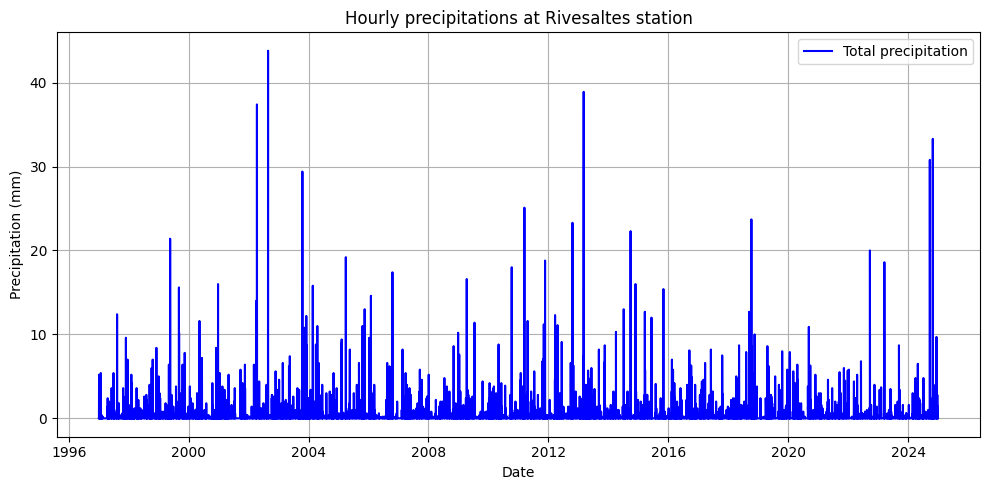

In [4]:
plot_data(
    sr_stdy,
    "Total precipitation",
    "Hourly precipitations",
    "hourly_rr"
)

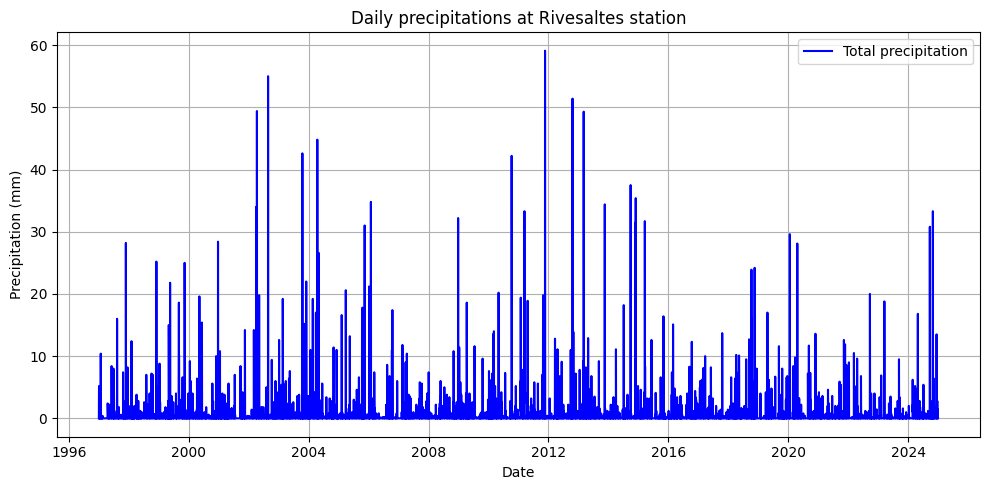

In [5]:
sr_stdy_d = sr_stdy.resample("D").sum()
plot_data(
    sr_stdy_d,
    "Total precipitation",
    "Daily precipitations",
    "daily_rr"
)

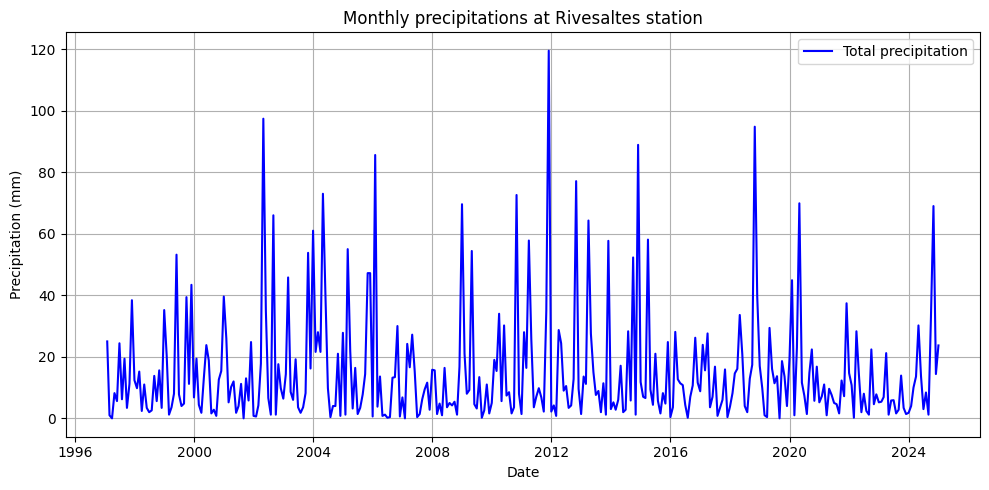

In [6]:
sr_stdy_m = sr_stdy.resample("ME").sum()
plot_data(
    sr_stdy_m,
    "Total precipitation",
    "Monthly precipitations",
    "monthly_rr"
)

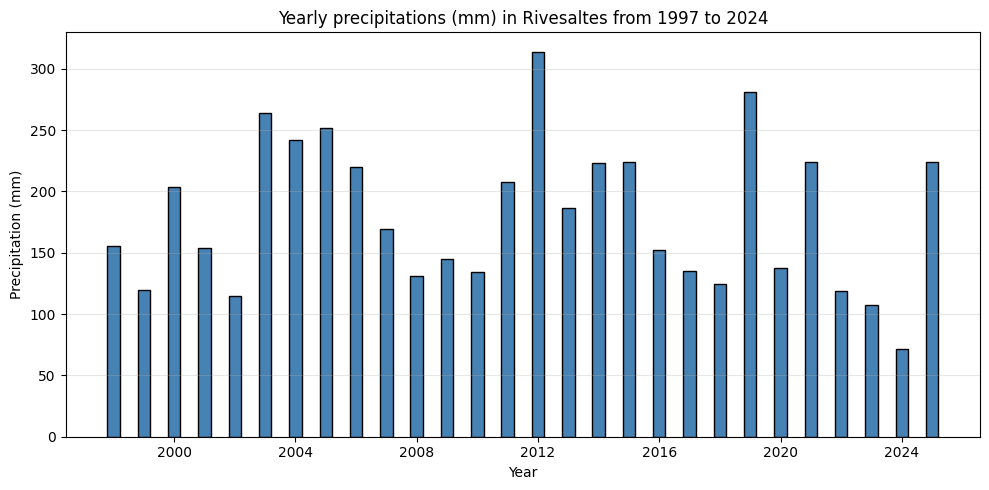

In [7]:
sr_stdy_y = sr_stdy.resample("YE").sum()

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(
    sr_stdy_y.index,
    sr_stdy_y.values,
    width=150,
    color="steelblue",
    edgecolor="black",
    linewidth=1.0
)
plt.title("Yearly precipitations (mm) in Rivesaltes from 1997 to 2024")
plt.xlabel("Year")
plt.ylabel("Precipitation (mm)")
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.savefig("figs/precip/yearly_rr.png", dpi=300, bbox_inches="tight")
plt.show()

## Working on a daily frequency

### Normal

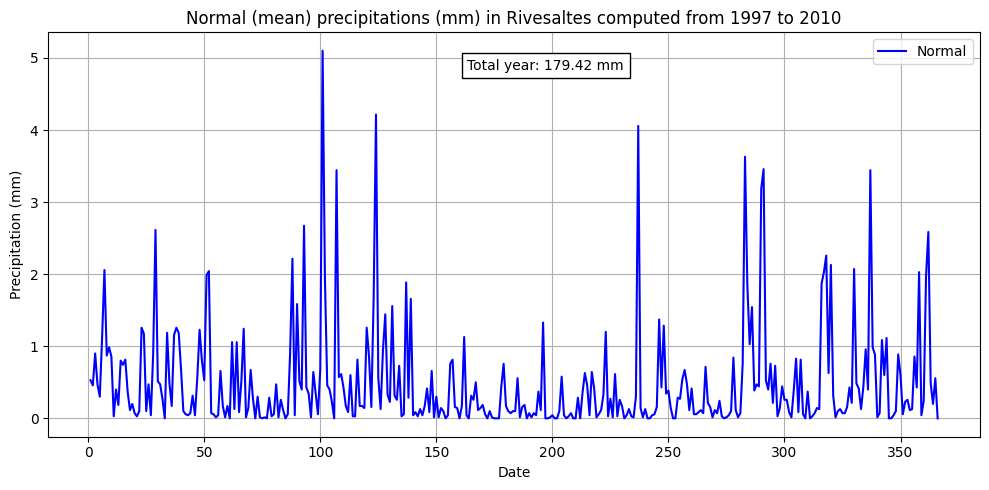

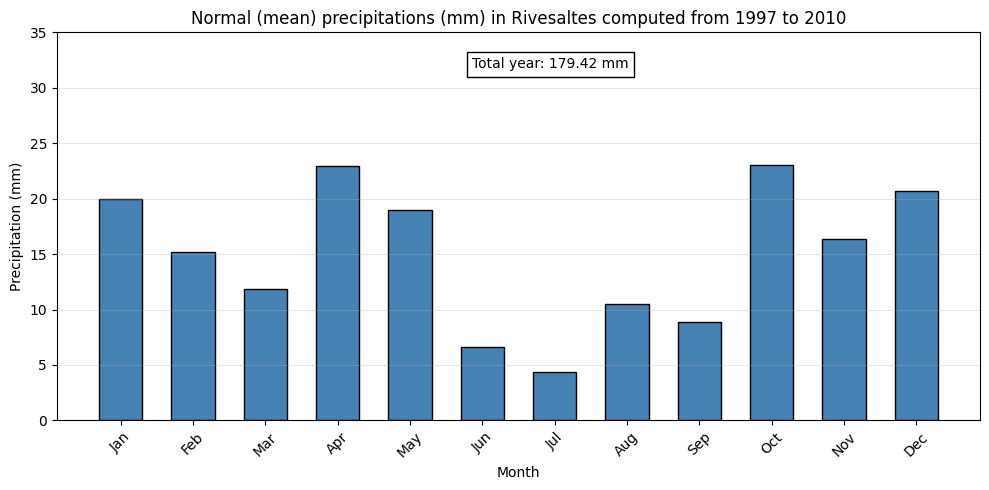

In [8]:
sr_clim_frst_d = precip_climato(
    sr,
    "1997-01-01 00:00:00",
    "2010-12-31 23:00:00",
    "D",
    "mean"
)

sr_clim_frst_m = precip_climato(
    sr,
    "1997-01-01 00:00:00",
    "2010-12-31 23:00:00",
    "M",
    "mean"
)

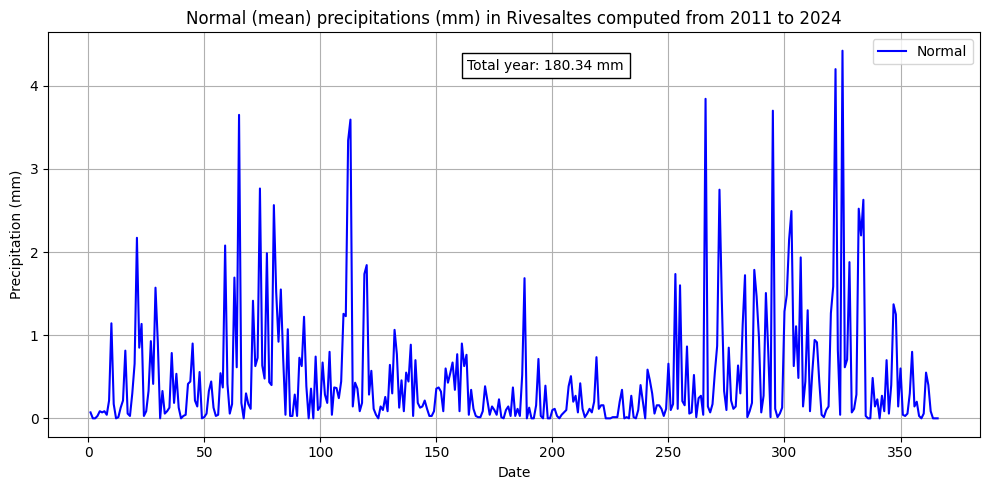

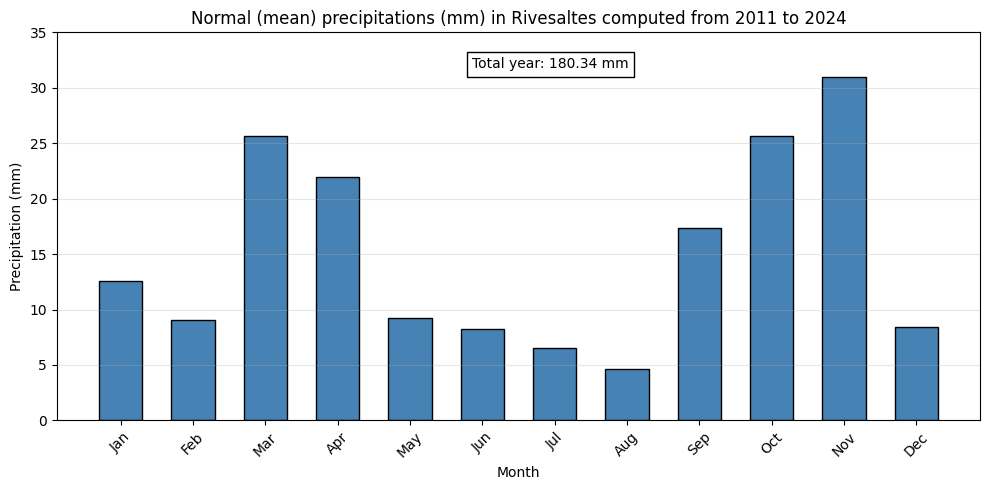

In [9]:
sr_clim_snd_d = precip_climato(
    sr,
    "2011-01-01 00:00:00",
    "2024-12-31 23:00:00",
    "D",
    "mean"
)

sr_clim_snd_m = precip_climato(
    sr,
    "2011-01-01 00:00:00",
    "2024-12-31 23:00:00",
    "M",
    "mean"
)